<a href="https://colab.research.google.com/github/ssp22/485Design-Project/blob/master/mass_balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

[13521.37655663] [12366.62612392] [957.30504824]
[13521.37670383] [12366.62641152] [957.30475329]
[13521.37670383] [12366.62641151] [957.3047533]
[13521.37685103] [12366.6266991] [957.30445835]
[13521.37685103] [12366.6266991] [957.30445835]
[13521.56372025] [12366.99177878] [956.93003521]
[13521.56372725] [12366.99179246] [956.93002118]
[13521.74839253] [12367.35256586] [956.56001451]
[13521.74840643] [12367.35259302] [956.55998666]
[13521.93090226] [12367.70912756] [956.19432733]
[13521.93091597] [12367.70915434] [956.19429986]
[13522.50115905] [12368.82321127] [955.05173078]
[13522.50121264] [12368.82331596] [955.05162341]
[13523.0504727] [12369.89637465] [953.95110171]
[13523.05039756] [12369.89622785] [953.95125227]
[13522.94473057] [12369.68979252] [954.16297095]
[13522.94468738] [12369.68970815] [954.16305748]
[13523.3749267] [12370.53024013] [953.30101354]
[13523.37492445] [12370.53023574] [953.30101803]
[13523.79234581] [12371.34572336] [952.46465935]
[13523.79233962] [12371.3

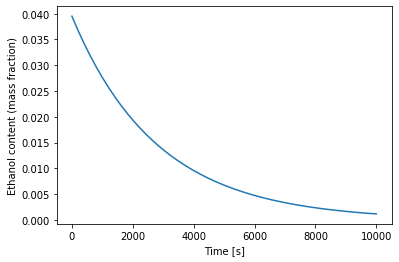

In [5]:
# Define parameters
dP = 40 # bar
dPi = 5.7 # bar
A = 1540000 # cm^2 # membrane area
R = 0.1 # at 40 bar, 5C
k_w = 8.75 * 10 ** (-6) # g / (cm^2 s bar)
diff_P = dP - dPi
X = 0.05 # split ratio
# J_P_ref = 3 * 10 ** (-4) # g / cm^2 s 

# Initial conditions
m_0 = 2400000 # g # initial batch feed
C_Et0 = 0.0395 # weight percent
M_f = 14000 # g / s # flow out of tank


def dCdt2(C_Et,t):
    # Define flow rates
    M_p1 = A * k_w * diff_P * (1 + C_Et * (1-R)) # 
    # M_p1 = A * J_P_ref
    M_r1 = M_f - M_p1
    C_r1 = (M_f * C_Et - M_p1 * (1-R) * C_Et) / M_r1
    M_p2 = A * k_w * diff_P * (1 + C_r1 * (1-R))
    # M_p2 = A * J_P_ref
    M_r2 = (1-X) * M_r1 - M_p2
    C_r2 = ((1-X)*M_r1*C_r1 - M_p2 * (1-R) * C_r1) / M_r2
    dCdt = (M_r1 * X * C_r1 + M_r2 * C_r2 - M_f * C_Et) / m_0
    M_water = M_p1 + M_p2
    print(M_r1,M_r2,M_water)
    return dCdt

t = np.linspace(0,10000)

# solve ODE
C = odeint(dCdt2,C_Et0,t)
print(C)



# plot results
plt.plot(t,C)
plt.xlabel('Time [s]')
plt.ylabel('Ethanol content (mass fraction)')
plt.show()



In [0]:
a = 40